In [89]:
#
# 効率フロンティアの描画
#（Pythonによるファイナンス入門，中妻照雄著，朝倉書店）を参照
#
#  by Y.MAEDA
#

In [90]:
#
# 効率フロンティアの計算
#
import cvxpy as cp
import numpy as np
import math
import numpy.linalg as lin
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
import numpy as np
import pandas as pd
FontPath = "/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc"
#FontPath = '/System/Library/Fonts/Osaka.ttf'
jpfont = FontProperties(fname=FontPath)

In [91]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [267]:
data1 = pd.read_csv("/Users/shintaro/Downloads/第2スクリーニング_検証.csv", encoding = 'Shift_Jis')
data2 = pd.read_csv('3rdscreening_Data(ver1.2).csv', encoding = 'Shift_Jis')

In [268]:
l_comp1 = data1.columns.tolist()
l_comp2 = data2['企業名'].tolist()

In [269]:
len_comp1 = len(l_comp1)
len_comp2 = len(l_comp2)

In [270]:
for i in range(len_comp1):
    if not(l_comp1[-(i + 1)] in l_comp2):
        del data1[l_comp1[-(i + 1)]]

In [271]:
#del data1['西日本フィナンシャルホールディングス']
del data1['関西電力']
del data1['静岡銀行']
del data1['キヤノン']

In [272]:
data1

日産自動車         ファンケル          住友林業          日本通運          ローソン  \
0    3.661800e+12  1.095600e+11  1.291500e+11  4.047400e+11  4.083600e+11   
1    3.327200e+12  1.177100e+11  1.183300e+11  4.036700e+11  4.083600e+11   
2    3.187100e+12  1.173200e+11  1.229500e+11  3.888000e+11  3.869500e+11   
3    3.621100e+12  1.154900e+11  1.360700e+11  4.270400e+11  3.974000e+11   
4    3.720500e+12  1.091100e+11  1.401500e+11  4.706000e+11  4.143400e+11   
..            ...           ...           ...           ...           ...   
135  2.600000e+12  4.868700e+11  4.361100e+11  7.910400e+11  5.446300e+11   
136  2.313000e+12  4.653600e+11  4.624800e+11  8.016000e+11  4.914700e+11   
137  2.275000e+12  4.497200e+11  4.050800e+11  8.419200e+11  4.944800e+11   
138  2.325600e+12  4.692700e+11  3.720000e+11  8.121600e+11  5.155400e+11   
139  2.663300e+12  4.523300e+11  4.111200e+11  7.641600e+11  5.506500e+11   

              東洋紡            東芝           富士通          住友商事          日本郵船  \
0    1.095700e+11  2.165400e+12  1.233700e+12  1.179300e+12  4.850000e+11   
1    1.028200e+11  2.106100e+12  1.150900e+12  1.274400e+12  5.320000e+11   
2    1.013200e+11  1.885700e+12  1.194400e+12  1.210600e+12  5.480000e+11   
3    1.118200e+11  2.046800e+12  1.266900e+12  1.344400e+12  6.280000e+11   
4    1.185800e+11  2.322200e+12  1.376600e+12  1.428200e+12  6.600000e+11   
..            ...           ...           ...           ...           ...   
135  1.268100e+11  1.702700e+12  3.312000e+12  1.973200e+12  6.420000e+11   
136  1.177200e+11  2.055600e+12  3.602900e+12  1.861900e+12  7.300000e+11   
137  1.203900e+11  2.092000e+12  3.681500e+12  1.911900e+12  7.680000e+11   
138  1.187000e+11  2.187600e+12  4.305600e+12  1.861900e+12  9.570000e+11   
139  1.232400e+11  2.139800e+12  3.843000e+12  1.855600e+12  1.000000e+12   

     ...          三菱電機         三井不動産        パナソニック         日立製作所          ヤマト  \
0    ...  1.470830e+12  1.373260e+12  3.250300e+12  1.283150e+12   8589920988   
1    ...  1.518070e+12  1.352990e+12  3.488240e+12  1.405140e+12   8374499772   
2    ...  1.565310e+12  1.322140e+12  3.029520e+12  1.323810e+12   8132150904   
3    ...  1.844450e+12  1.398820e+12  3.507870e+12  1.576830e+12   8724559248   
4    ...  1.810090e+12  1.541610e+12  3.390120e+12  1.888580e+12   8805342204   
..   ...           ...           ...           ...           ...          ...   
135  ...  3.622330e+12  2.426720e+12  3.493870e+12  4.843300e+12  18122309796   
136  ...  3.611590e+12  2.287720e+12  3.162640e+12  5.208190e+12  17799177972   
137  ...  3.633070e+12  2.461470e+12  3.059590e+12  5.551790e+12  21030496212   
138  ...  3.463440e+12  2.483670e+12  3.155280e+12  6.158940e+12  21542121600   
139  ...  3.169270e+12  2.464880e+12  3.204750e+12  6.059210e+12  21111279168   

              リコー         川崎重工業          エーザイ       コニカミノルタ         三菱重工業  
0    9.788140e+11  3.906930e+11  1.014260e+12  5.061440e+11  1.099810e+12  
1    9.639160e+11  3.890240e+11  9.979480e+11  4.912580e+11  1.066070e+12  
2    9.184770e+11  3.840150e+11  1.027600e+12  4.886000e+11  1.113300e+12  
3    1.087570e+12  4.307640e+11  9.890510e+11  5.800460e+11  1.305600e+12  
4    1.196330e+12  4.942100e+11  9.564280e+11  6.321490e+11  1.281990e+12  
..            ...           ...           ...           ...           ...  
135  8.372810e+11  4.581350e+11  2.200230e+12  3.015990e+11  1.163570e+12  
136  8.655880e+11  4.365810e+11  2.114230e+12  3.106470e+11  1.095420e+12  
137  9.668960e+11  4.397560e+11  2.182140e+12  3.005930e+11  1.118360e+12  
138  9.289050e+11  3.968160e+11  3.239990e+12  3.086360e+11  1.102850e+12  
139  8.871900e+11  3.806090e+11  2.664060e+12  2.814920e+11  1.060670e+12  

[140 rows x 36 columns]

In [253]:
marketcap = pd.read_csv('submission (1).csv', encoding = 'Shift_Jis')#, encoding = 'Shift_jis')
#del marketcap['TOPIX']
#del marketcap['キヤノン']
#del marketcap['銘柄名称']
del marketcap['Date']

In [273]:
marketcap

1780.T      1848.T       1961.T       1975.T       1980.T  \
0    897.390198  752.400208  1185.525269  3208.392090  2725.768555   
1    897.390198  752.400208  1185.525269  3208.392090  2725.768555   
2    897.390198  752.400208  1185.525269  3208.392090  2725.768555   
3    903.261963  783.869446  1183.795654  3258.452637  2730.281494   
4    904.240601  836.318054  1178.607544  3263.003174  2694.178467   
..          ...         ...          ...          ...          ...   
952  923.000000  531.000000  1440.000000  3360.000000  2277.000000   
953  925.000000  521.000000  1450.000000  3340.000000  2240.000000   
954  923.000000  516.000000  1442.000000  3325.000000  2161.000000   
955  932.000000  522.000000  1460.000000  3445.000000  2215.000000   
956  933.000000  518.000000  1435.000000  3310.000000  2179.000000   

          2002.T       2004.T      2009.T       2053.T       2801.T  ...  \
0    2147.516602  2711.074951  946.234558  2329.213379  4430.113281  ...   
1    2147.516602  2711.074951  946.234558  2329.213379  4430.113281  ...   
2    2147.516602  2711.074951  946.234558  2329.213379  4430.113281  ...   
3    2183.371338  2724.935303  951.003845  2332.934570  4527.263672  ...   
4    2194.694092  2714.771240  958.634827  2348.747559  4541.836426  ...   
..           ...          ...         ...          ...          ...  ...   
952  1722.000000  2774.000000  760.000000  1057.000000  9150.000000  ...   
953  1720.000000  2783.000000  756.000000  1049.000000  9250.000000  ...   
954  1724.000000  2794.000000  754.000000  1037.000000  9350.000000  ...   
955  1744.000000  2793.000000  760.000000  1052.000000  9680.000000  ...   
956  1739.000000  2815.000000  765.000000  1044.000000  9590.000000  ...   

          7905.T       7952.T       7957.T      7962.T      7971.T  \
0    2563.339111  2445.788818  1730.771484  954.536316  389.696259   
1    2563.339111  2445.788818  1730.771484  954.536316  389.696259   
2    2563.339111  2445.788818  1730.771484  954.536316  389.696259   
3    2615.651855  2436.290283  1733.458984  962.015503  412.619568   
4    2588.623535  2466.684570  1733.458984  962.015503  407.329590   
..           ...          ...          ...         ...         ...   
952  2434.000000  3365.000000  1690.000000  878.000000  231.000000   
953  2434.000000  3470.000000  1690.000000  893.000000  234.000000   
954  2427.000000  3475.000000  1690.000000  889.000000  232.000000   
955  2458.000000  3570.000000  1690.000000  897.000000  234.000000   
956  2370.000000  3515.000000  1719.000000  902.000000  235.000000   

          7975.T       8088.T       8096.T      8139.T       9619.T  
0    2202.144287  3458.784424  2911.429443  233.123322  1446.206299  
1    2202.144287  3458.784424  2911.429443  233.123322  1446.206299  
2    2202.144287  3458.784424  2911.429443  233.123322  1446.206299  
3    2267.739990  3520.718750  2950.191162  234.889435  1473.054077  
4    2247.123779  3535.010986  3014.793701  234.006393  1474.843750  
..           ...          ...          ...         ...          ...  
952  1791.000000  6720.000000  3725.000000  174.000000  1424.000000  
953  1800.000000  6500.000000  3695.000000  177.000000  1425.000000  
954  1797.000000  6420.000000  3725.000000  174.000000  1425.000000  
955  1771.000000  6390.000000  3765.000000  177.000000  1434.000000  
956  1790.000000  6410.000000  3755.000000  180.000000  1411.000000  

[957 rows x 56 columns]

In [274]:
Mu

array([ 1.20998425e-02, -2.03315784e-03,  3.18815542e-02,  2.15055709e-02,
        1.65427396e-03, -8.28490410e-03,  9.60637944e-03, -9.15750748e-03,
       -5.30587360e-02,  1.02106383e-01, -1.05669986e-02, -1.69942471e-02,
        1.37272588e-04, -5.48520146e-02,  8.04354387e-02,  9.61985034e-03,
        8.98046913e-03, -2.51897390e-02,  9.86940055e-02,  9.55285220e-02,
        1.08250612e-02,  4.77529031e-02, -3.53489519e-03,  5.87512990e-02,
       -1.59739344e-02,  5.82708409e-03, -4.14052871e-02,  2.69479101e-02,
        3.44329537e-02,  1.37404399e-01,  6.34050926e-03,  7.98572812e-02,
        7.70902263e-02,  4.44636627e-02,  9.05632193e-03,  2.27755290e-02,
        4.99359470e-03,  6.09111550e-02,  1.31132180e-02, -5.95834115e-03,
       -2.79563767e-02, -6.82074917e-03, -3.63947416e-02,  1.71681774e-02,
        1.23324555e-01, -4.42760435e-02,  1.67687087e-02,  7.60928467e-02,
        1.11573296e-02,  4.13882642e-03, -3.60691300e-02, -8.54698919e-03,
        7.44027735e-02,  

In [275]:
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100  #33

<Figure size 432x288 with 0 Axes>

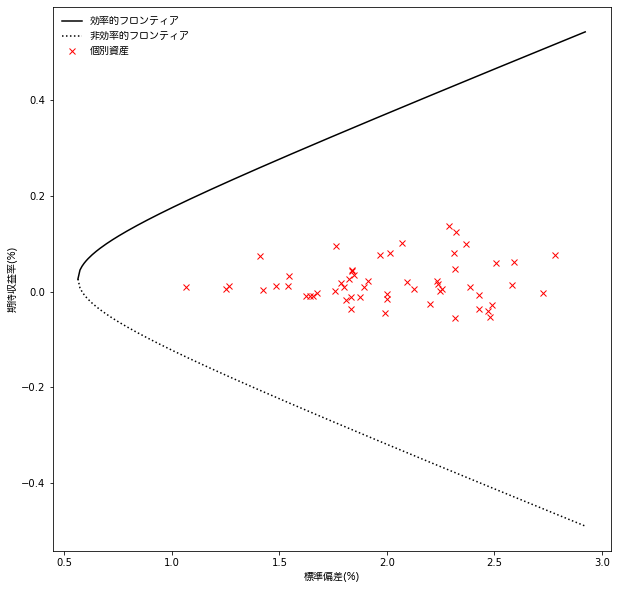

In [276]:
#
# ５つの資産のポートフォリオの場合
# Mu：収益率の平均値
# Stdev：収益率の標準偏差
#　CorrMatrix：収益率の相関行列
#
# ＜＜＜＜＜これらの変数を資産の数に応じて計算して，この部分を置き換えてください．＞＞＞＞＞
#
#

Mu = R.mean().values#np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev = R.std().values#np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix = R.corr().values#np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
                       #[0.25, 1.00, 0.36, 0.20, 0.20],
                       #[0.18, 0.36, 1.00, 0.25, 0.36],
                       #[0.10, 0.20, 0.25, 1.00, 0.45],
                       #[0.25, 0.20, 0.36, 0.45, 1.00]])

Sigma = np.diag(Stdev).dot(CorrMatrix).dot(np.diag(Stdev))
iota = np.ones(Mu.shape)
inv_Sigma = lin.inv(Sigma)

#print(Sigma,iota,inv_Sigma)

A = Mu.dot(inv_Sigma).dot(iota)
B = Mu.dot(inv_Sigma).dot(Mu)
C = iota.dot(inv_Sigma).dot(iota)
D = B*C - A**2
V_Target = np.linspace(Mu.min(), Mu.max(), num=5)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape [0] , Mu.shape [0]))
for idx, Target_Return in enumerate(V_Target):
    V_Weight [idx, :] = (C*Target_Return - A)/D*lin.solve (Sigma, Mu)\
    + (B-A*Target_Return)/D*lin.solve (Sigma, iota)
    V_Risk[idx] = (C/D) * (Target_Return - A/C)**2 + 1.0/C

# 最小分散フロンティアの作図
sigma_gmv = 1.0/np.sqrt(C)
sigma_p = np.linspace(sigma_gmv, 1.05*np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs (C*sigma_p**2 - 1.0)*D))/C
mu_p_inefficient = (A - np.sqrt(np.abs(C*sigma_p**2 - 1.0) *D))/C
figi = plt.figure(1, facecolor='w')
plt.figure(figsize=(10, 10))
plt.plot(sigma_p, mu_p_efficient, 'k-')
plt.plot(sigma_p, mu_p_inefficient, 'k:')
plt.plot(np. sqrt(np.diagonal (Sigma)), Mu, 'rx')
plt.legend ([u'効率的フロンティア', u'非効率的フロンティア', u'個別資産'],
loc='best', frameon=False, prop=jpfont)
plt.xlabel(u'標準偏差(%)', fontproperties=jpfont)
plt.ylabel(u'期待収益率(%)', fontproperties=jpfont)
plt.show()

In [277]:
#
# 期待収率の目標値
#

V_Target

array([-0.05485201, -0.00678791,  0.04127619,  0.0893403 ,  0.1374044 ])

In [278]:
#
# 期待収率の目標値に対する投資割合
#

V_Weight

array([[ 8.69454241e-02, -1.09819378e-02,  1.79435918e-02,
         2.49877394e-02, -1.26918158e-02,  4.06088744e-02,
         2.68750282e-01,  4.70636844e-02, -2.07957914e-02,
        -7.49012004e-02,  8.55406521e-02,  7.01144215e-02,
         4.49621555e-02,  2.43828204e-02, -1.61543225e-02,
        -2.80406741e-02,  8.59569356e-02,  7.09335381e-03,
        -5.51933075e-02, -1.05629396e-01,  6.77069090e-02,
        -4.68768891e-02,  1.90091432e-02,  2.62806936e-03,
         2.07715492e-02,  1.83991353e-01,  3.62500801e-02,
         7.08508453e-02, -2.25618110e-02, -5.90273859e-02,
         3.09665972e-03, -3.25656514e-02, -4.74206560e-02,
        -8.87505579e-02,  1.03821882e-02,  4.62133549e-03,
         4.42783661e-02, -4.14054797e-02,  9.33080899e-03,
         6.10241689e-02, -1.69413714e-02,  2.72544417e-02,
         1.61974343e-02,  1.34312833e-04, -3.61204828e-02,
         7.92770930e-02, -3.17686377e-02, -4.80727154e-02,
         8.24011428e-02,  4.69338975e-02,  1.25846202e-0

In [279]:
####################################################
#
#　効率フロンティアの描画
#　非負制約を入れた場合
#
#（Pythonによるファイナンス入門，中妻照雄著，朝倉書店）を参照
#
#  by Y.MAEDA
#
####################################################

/Users/shintaro/opt/anaconda3/envs/finance/lib/python3.8/site-packages/cvxpy/expressions/expression.py:558: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 32 times so far.

  warnings.warn(msg, UserWarning)


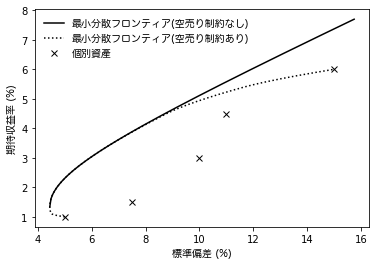

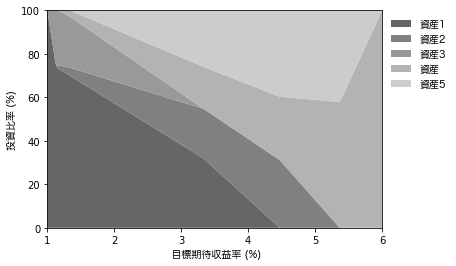

In [280]:
import numpy as np
import numpy.linalg as lin
import cvxpy as cvx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
FontPath = "/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc"
#FontPath = '/System/Library/Fonts/Osaka.ttf'
jpfont = FontProperties(fname=FontPath)

#2. 最小分散ポートフォリオの計算
Mu = np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev = np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix = np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
                       [0.25, 1.00, 0.36, 0.20, 0.20],
                       [0.18, 0.36, 1.00, 0.25, 0.36],
                       [0.10, 0.20, 0.25, 1.00, 0.45],
                       [0.25, 0.20, 0.36, 0.45, 1.00]])
                       
Sigma = np.diag(Stdev).dot (CorrMatrix).dot (np.diag (Stdev))
iota = np.ones (Mu.shape)
inv_Sigma = lin.inv(Sigma)
A = Mu.dot (inv_Sigma).dot (iota)
B = Mu.dot (inv_Sigma).dot (Mu)
C = iota. dot (inv_Sigma).dot (iota)
D = B*C - A**2

#22 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable (Mu.shape [0])

#Target_Return = cvx.Parameter(sign='positive')
Target_Return=cvx.Parameter(nonneg=True)

Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem (cvx.Minimize (Risk_Variance),
    [Weight. T*Mu == Target_Return,
     
    #cvx.sum_entries(Weight) == 1.0,
    cvx.sum(Weight) == 1.0,
    Weight >= 0.0])

#22. 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace (Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape [0], Mu.shape [0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve()
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
    
#2237.最小分散フロンティアの作図
sigma_gmv = 1.0/np.sqrt(C)
sigma_p = np.linspace (sigma_gmv, 1.05*np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs (C*sigma_p**2 - 1.0)*D))/C
figi = plt.figure(1, facecolor='w')
plt.plot (sigma_p, mu_p_efficient, 'k-')
plt.plot(V_Risk, V_Target, 'k:')
plt.plot(np.sqrt (np.diagonal (Sigma)), Mu, 'kx')
plt.legend([u'最小分散フロンティア(空売り制約なし)',
    u'最小分散フロンティア(空売り制約あり)',
    u'個別資產'],
    loc='best', frameon=False, prop=jpfont)
            
plt.xlabel(u'標準偏差 (%)', fontproperties=jpfont)
plt.ylabel (u'期待収益率 (%)', fontproperties=jpfont)

#投資比率の推移の作図
fig2 = plt.figure(2, facecolor='w')
plt.stackplot (V_Target, V_Weight. T*100,
    colors=tuple([tuple(gray*np.ones (3))
        for gray in np.linspace(0.4,0.8, num=Mu.shape [0])]))  

plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend ( [u'資産1', u'資産2', '資産3', u'資産', u'資産5'],
loc='upper left', bbox_to_anchor=(1.0, 1.0),

frameon=False, prop=jpfont)
plt.xlabel (u' 目標期待収益率 (%)', fontproperties=jpfont)
plt.ylabel(u'投資比率 (%)', fontproperties=jpfont)
plt.show()

In [282]:
import numpy as np
import numpy.linalg as lin
import cvxpy as cvx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
FontPath = "/System/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc"
#FontPath = '/System/Library/Fonts/Osaka.ttf'
jpfont = FontProperties(fname=FontPath)

#2. 最小分散ポートフォリオの計算
Mu = R.mean().values#np.array([1.0, 3.0, 1.5, 6.0, 4.5])
Stdev = R.std().values#np.array([5.0, 10.0, 7.5, 15.0, 11.0])
CorrMatrix = R.corr().values#np.array([[1.00, 0.25, 0.18, 0.10, 0.25],
                       #[0.25, 1.00, 0.36, 0.20, 0.20],
                       #[0.18, 0.36, 1.00, 0.25, 0.36],
                       #[0.10, 0.20, 0.25, 1.00, 0.45],
                       
Sigma = np.diag(Stdev).dot (CorrMatrix).dot (np.diag (Stdev))
iota = np.ones (Mu.shape)
inv_Sigma = lin.inv(Sigma)
A = Mu.dot (inv_Sigma).dot (iota)
B = Mu.dot (inv_Sigma).dot (Mu)
C = iota. dot (inv_Sigma).dot (iota)
D = B*C - A**2

#22 空売り制約の下での分散最小化問題の設定
Weight = cvx.Variable (Mu.shape [0])

#Target_Return = cvx.Parameter(sign='positive')
Target_Return=cvx.Parameter(nonneg=False)


Risk_Variance = cvx.quad_form(Weight, Sigma)
Opt_Portfolio = cvx.Problem (cvx.Minimize (Risk_Variance),
    [Weight. T*Mu == Target_Return,
     
    #cvx.sum_entries(Weight) == 1.0,
    cvx.sum(Weight) == 1.0,
    Weight >= 0.0])

#22. 空売り制約の下での最小分散フロンティアの計算
V_Target = np.linspace (Mu.min(), Mu.max(), num=250)
V_Risk = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape [0], Mu.shape [0]))
for idx, Target_Return.value in enumerate(V_Target):
    Opt_Portfolio.solve(verbose=True)
    V_Weight[idx, :] = Weight.value.T
    V_Risk[idx] = np.sqrt(Risk_Variance.value)
    
#2237.最小分散フロンティアの作図
sigma_gmv = 1.0/np.sqrt(C)
sigma_p = np.linspace (sigma_gmv, 1.05*np.max(Stdev), num=250)
mu_p_efficient = (A + np.sqrt(np.abs (C*sigma_p**2 - 1.0)*D))/C
figi = plt.figure(1, facecolor='w')
plt.plot (sigma_p, mu_p_efficient, 'k-')
plt.plot(V_Risk, V_Target, 'k:')
plt.plot(np.sqrt (np.diagonal (Sigma)), Mu, 'rx')
plt.legend([u'最小分散フロンティア(空売り制約なし)',
    u'最小分散フロンティア(空売り制約あり)',
    u'個別資產'],
    loc='best', frameon=False, prop=jpfont)
            
plt.xlabel(u'標準偏差 (%)', fontproperties=jpfont)
plt.ylabel (u'期待収益率 (%)', fontproperties=jpfont)

#投資比率の推移の作図
fig2 = plt.figure(2, facecolor='w')
plt.stackplot (V_Target, V_Weight. T*100,
    colors=tuple([tuple(gray*np.ones (3))
        for gray in np.linspace(0.4,0.8, num=Mu.shape [0])]))  

plt.axis([Mu.min(), Mu.max(), 0.0, 100.0])
plt.legend ( [u'資産1', u'資産2', u'資産3', u'資産4', u'資産5', u'資産6', u'資産7', u'資産8', u'資産9', u'資産10', u'資産11', u'資産12', u'資産13', u'資産14', u'資産15', u'資産16'],
loc='upper left', bbox_to_anchor=(1.0, 1.0),

frameon=False, prop=jpfont)
plt.xlabel (u' 目標期待収益率 (%)', fontproperties=jpfont)
plt.ylabel(u'投資比率 (%)', fontproperties=jpfont)
plt.show()

                                     CVXPY                                     
                                    v1.1.17                                    
(CVXPY) Nov 17 11:16:51 AM: Your problem has 56 variables, 3 constraints, and 1 parameters.
(CVXPY) Nov 17 11:16:51 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Nov 17 11:16:51 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Nov 17 11:16:51 AM: Compiling problem (target solver=OSQP).
(CVXPY) Nov 17 11:16:51 AM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Nov 17 11:16:51 AM: Applying reduction CvxAttr2Constr
(CVXPY) Nov 17 11:16:51 AM: Applying reduction Qp2SymbolicQp


/Users/shintaro/opt/anaconda3/envs/finance/lib/python3.8/site-packages/cvxpy/expressions/expression.py:558: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 34 times so far.

  warnings.warn(msg, UserWarning)


-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 56, constraints m = 58
          nnz(P) + nnz(A) = 1764
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   1.00e+00   3.92e+02   1.00e-01   4.13e-04s
 200   2.4710e+00   4.90e-03   1.75e-03   7.13e-01   2.20e-03s
 400   2.7450e+00   3.28e-03   1.50e-02   3.89

SolverError: Solver 'OSQP' failed. Try another solver, or solve with verbose=True for more information.

In [216]:
(V_Weight.T *100).tolist()

[[-1.6728831008093938e-12,
  -1.398129507873756e-12,
  -1.1233768621328374e-12,
  -8.486237504457525e-13,
  -5.738703193641413e-13,
  -5.772068814989812e-15,
  -4.9954423670596915e-15,
  -4.218682814688618e-15,
  -3.4420417497874334e-15,
  -2.6652546974949055e-15,
  -1.8885580960014033e-15,
  -7.918952817715565e-17,
  -6.217476734900535e-17,
  -4.5000346305113795e-17,
  -4.74494652748719e-19,
  -3.661464991347056e-19,
  -3.1621018816945906e-19,
  -8.736958665263287e-21,
  -3.672317926886186e-22,
  -7.0011616728198495e-22,
  5.904760292743599e-22,
  -4.097465021480827e-21,
  -4.844118245081588e-21,
  3.474853436925348e-21,
  4.041510498073805e-21,
  3.239314163388686e-21,
  -2.8661170535661098e-21,
  2.8247143762669784e-21,
  -3.6951969903587636e-22,
  -4.900380941753847e-22,
  -3.782611268938219e-22,
  -3.1073678248606084e-21,
  4.22581425052354e-21,
  -2.8612320262750654e-21,
  2.1380799747325286e-21,
  -3.058705753477379e-21,
  2.7516448446888694e-21,
  4.56431205284154e-21,
  2.8064

In [217]:
#V_Target

In [218]:
#for i in range(len(V_Weight)):
#    print(V_Weight[i])

In [164]:
#
# 最適ポートフォリオの決定
#

In [250]:
for i in range(len(V_Weight)):
    print('(',i,') 目標収益率=%.3f リスク=%.3f 効用=%.3f'
          %(V_Target[i],V_Risk[i],math.log(V_Target[i])+math.log(18-V_Risk[i])*100))
    print('ポートフォリオ=%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f,%.3f'
          %(V_Weight[i][0],V_Weight[i][1],V_Weight[i][2],V_Weight[i][3],V_Weight[i][4],V_Weight[i][5],V_Weight[i][6],V_Weight[i][7],V_Weight[i][8],V_Weight[i][9],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14],V_Weight[i][15],V_Weight[i][16],V_Weight[i][17],V_Weight[i][18],V_Weight[i][19],V_Weight[i][20],V_Weight[i][21],V_Weight[i][22],V_Weight[i][23],V_Weight[i][24],V_Weight[i][25],V_Weight[i][26],V_Weight[i][27],V_Weight[i][28],V_Weight[i][29],V_Weight[i][30],V_Weight[i][31],V_Weight[i][32],V_Weight[i][33],V_Weight[i][34],V_Weight[i][35]))#,V_Weight[i][36],V_Weight[i][37],V_Weight[i][38],V_Weight[i][39],V_Weight[i][40],V_Weight[i][41],V_Weight[i][42],V_Weight[i][43],V_Weight[i][44],V_Weight[i][10],V_Weight[i][11],V_Weight[i][12],V_Weight[i][13],V_Weight[i][14],V_Weight[i][15],V_Weight[i][16],V_Weight[i][17],V_Weight[i][18],V_Weight[i][19],V_Weight[i][20],V_Weight[i][21],V_Weight[i][22],V_Weight[i][23],V_Weight[i][24],V_Weight[i][25],V_))
    print()

ValueError: math domain error